In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv('adult.csv')
df.shape

(48842, 15)

In [3]:
df.drop(['educational-num'], axis=1, inplace=True)

In [4]:
df.isin(['?']).sum()
df.replace('?', np.nan, inplace=True)


In [5]:
features_with_na=[features for features in df.columns if df[features].isnull().sum()>0.1]
for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean()*100, 4),  ' % missing values')

workclass 5.7307  % missing values
occupation 5.7512  % missing values
native-country 1.7546  % missing values


In [6]:
df.dropna(inplace=True)

In [7]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [8]:
numeric_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]
numeric_cols

['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']

In [9]:
categorical_cols = [col for col in df.columns if df[col].dtype == 'object']
categorical_cols

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native-country',
 'income']

In [10]:
df.shape

(45175, 14)

In [11]:
def prob_num(df):
    for i in df.select_dtypes(include=['int64','float64']).columns:
        print(i, df[i].value_counts(normalize=True))
prob_num(df)

age 36    0.028401
33    0.028312
31    0.028179
35    0.028135
23    0.027382
        ...   
85    0.000111
88    0.000111
89    0.000022
86    0.000022
87    0.000022
Name: age, Length: 74, dtype: float64
fnlwgt 203488    0.000465
120277    0.000398
125892    0.000398
126569    0.000376
113364    0.000376
            ...   
340043    0.000022
337992    0.000022
124818    0.000022
167999    0.000022
65584     0.000022
Name: fnlwgt, Length: 26741, dtype: float64
capital-gain 0        0.916104
15024    0.011024
7688     0.008655
7298     0.007770
99999    0.005069
           ...   
7262     0.000022
1731     0.000022
22040    0.000022
1639     0.000022
2387     0.000022
Name: capital-gain, Length: 121, dtype: float64
capital-loss 0       0.952629
1902    0.006508
1977    0.005445
1887    0.005047
2415    0.001505
          ...   
2201    0.000022
1911    0.000022
2080    0.000022
419     0.000022
2163    0.000022
Name: capital-loss, Length: 97, dtype: float64
hours-per-week 40    0.4722

In [12]:
def plot_num_var(df):
    plot = df.select_dtypes(include=['int64','float64']).columns
    for i in plot:
        plt.figure(figsize=(14,8))
        plt.hist(df[i], bins=20)
        plt.title(i)
        plt.show()

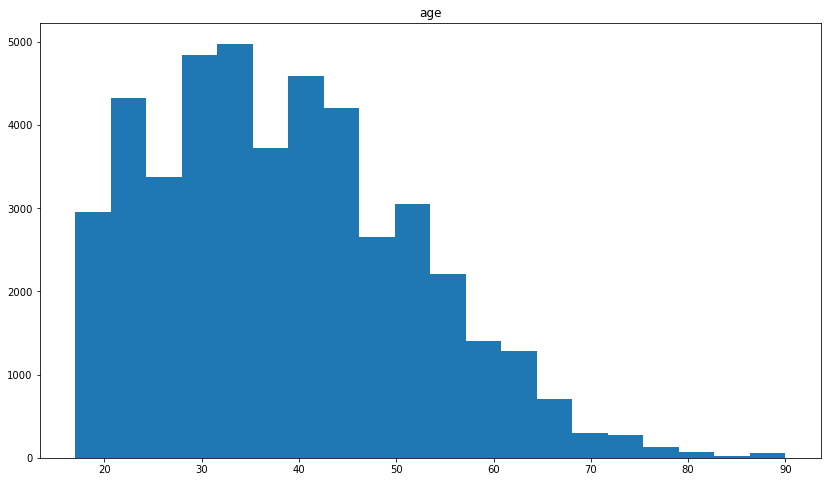

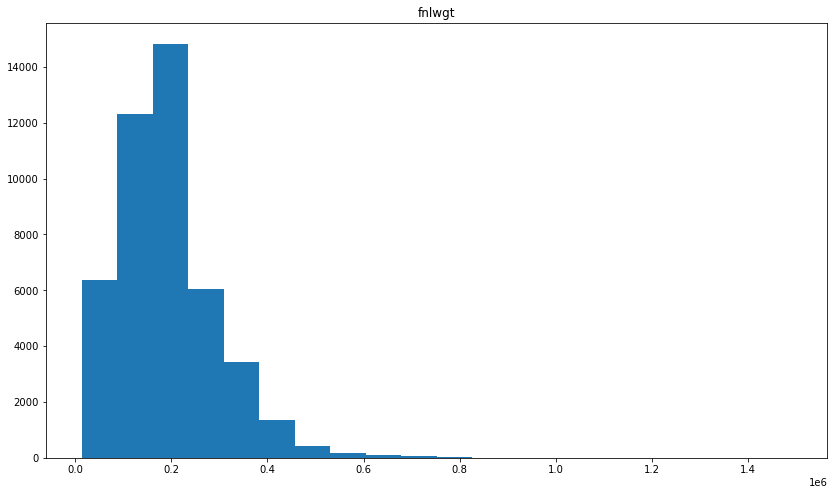

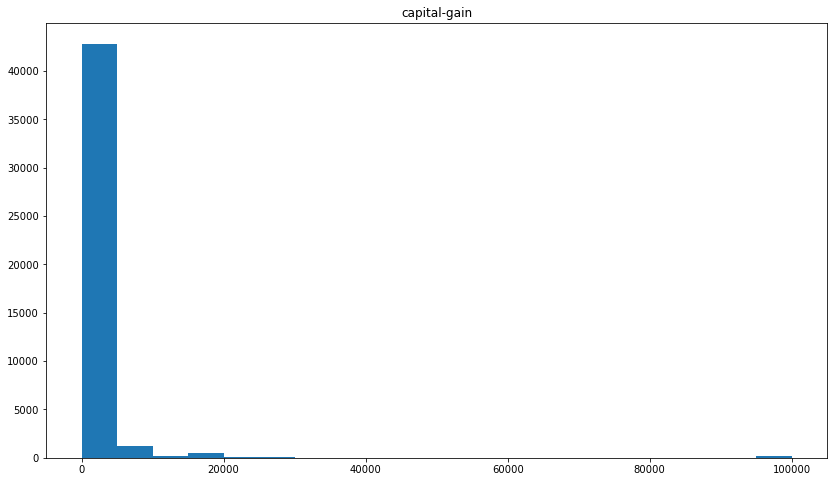

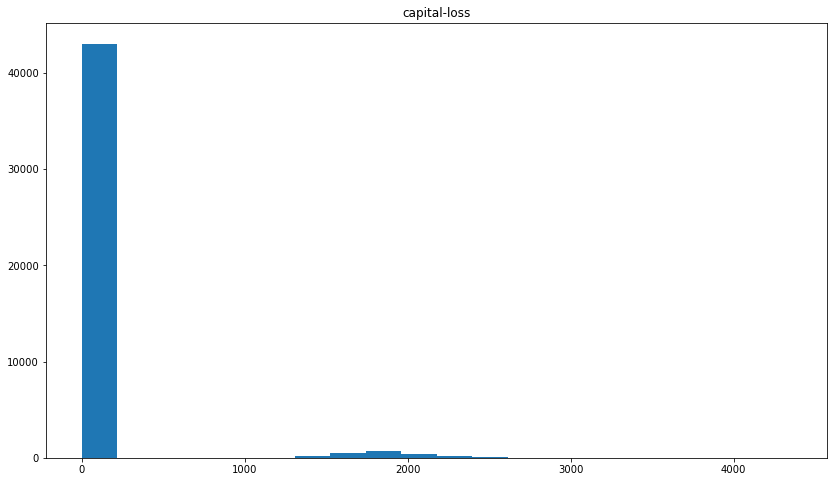

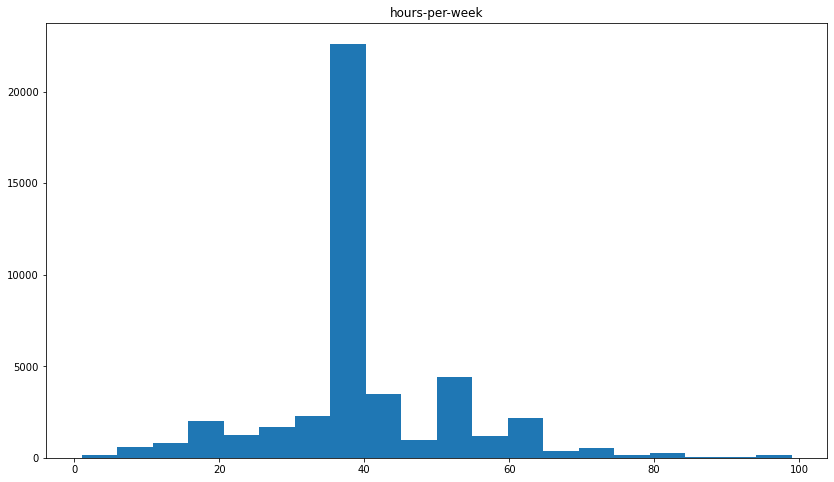

In [13]:
plot_num_var(df)

In [14]:
def plot_cat_var(df):
    plot = df.select_dtypes(include=['object']).columns
    for i in plot:
        plt.figure(figsize=(14,8))
        plt.xticks(rotation=90)
        plt.hist(df[i], bins=20)
        plt.title(i)
        plt.show()

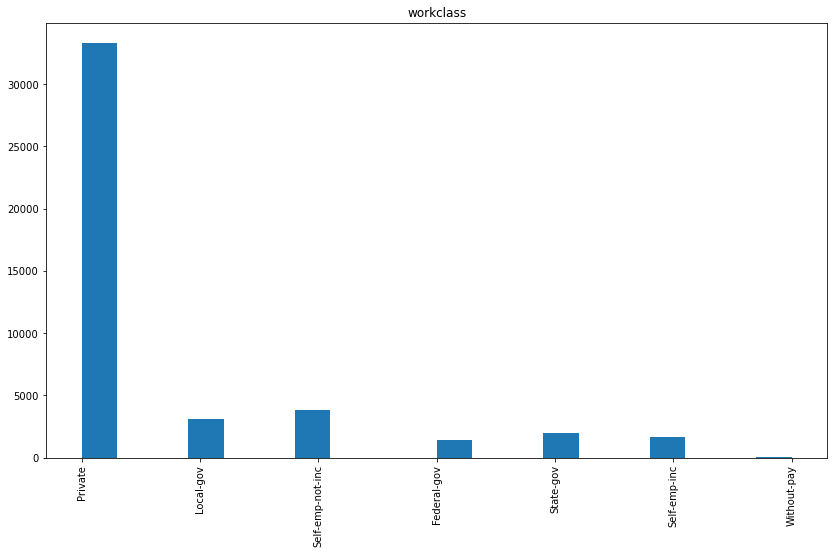

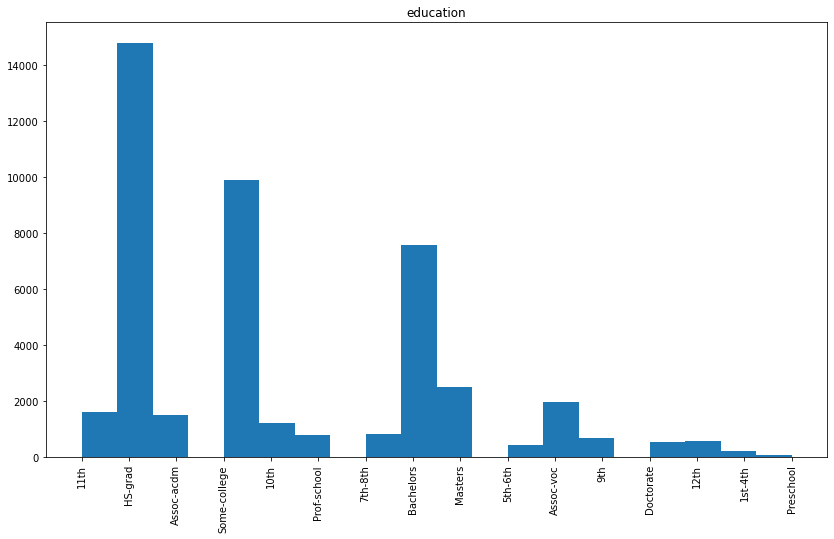

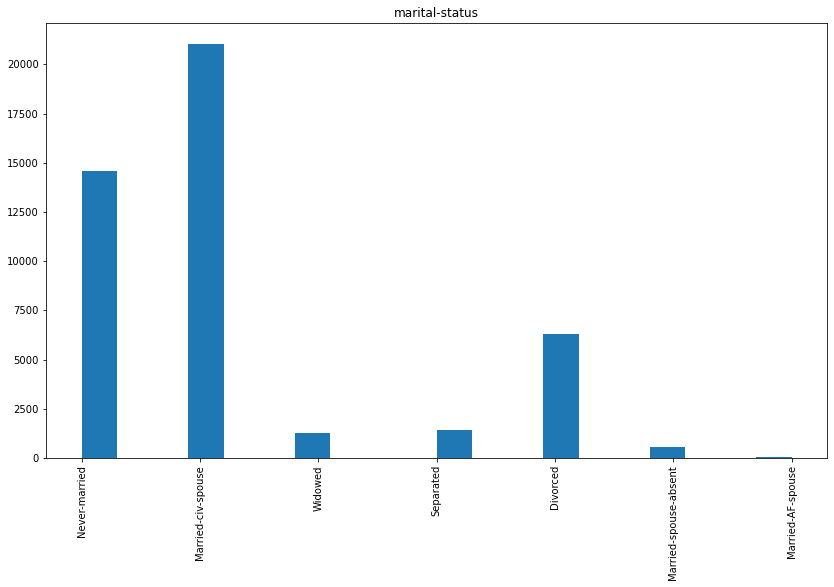

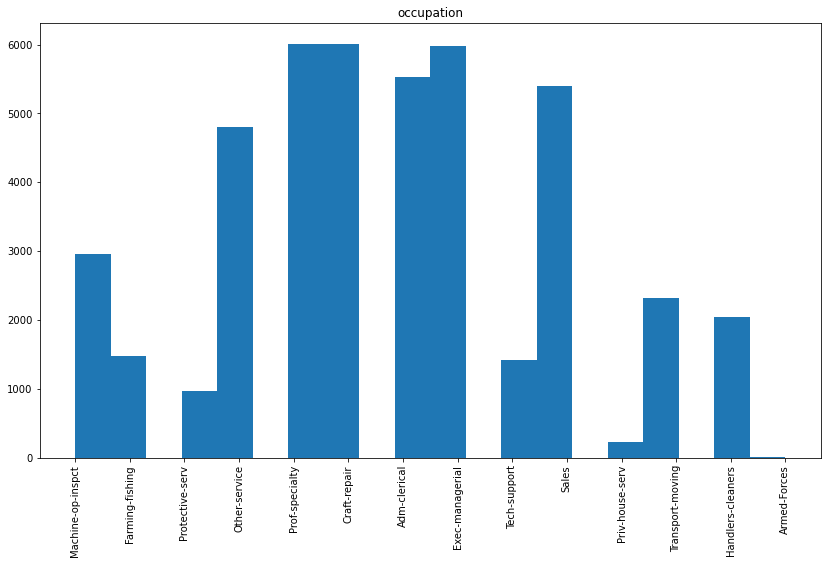

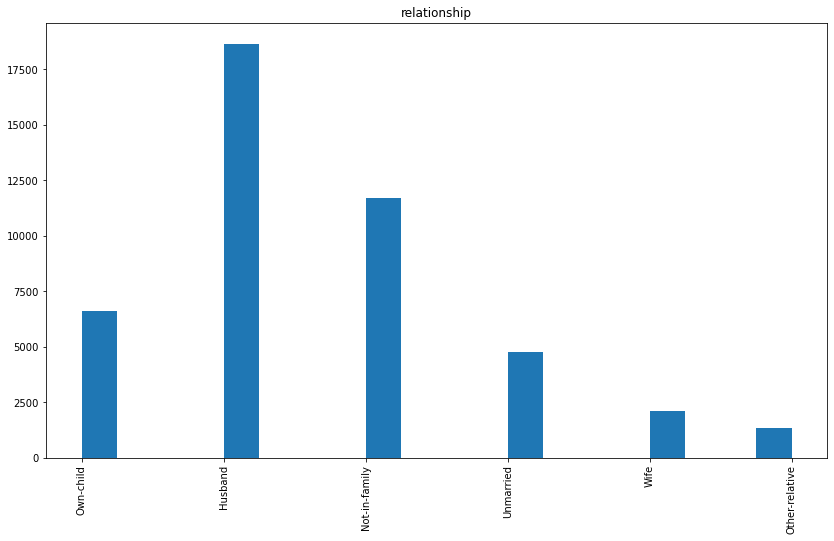

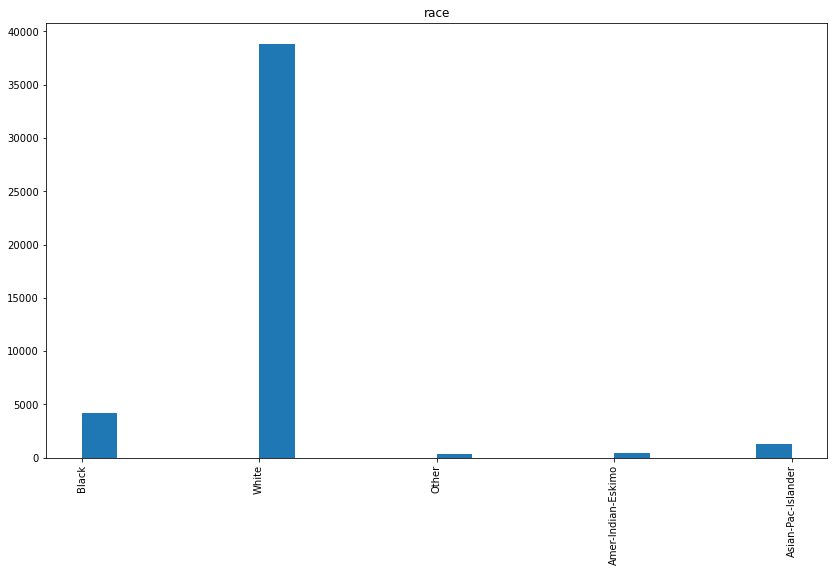

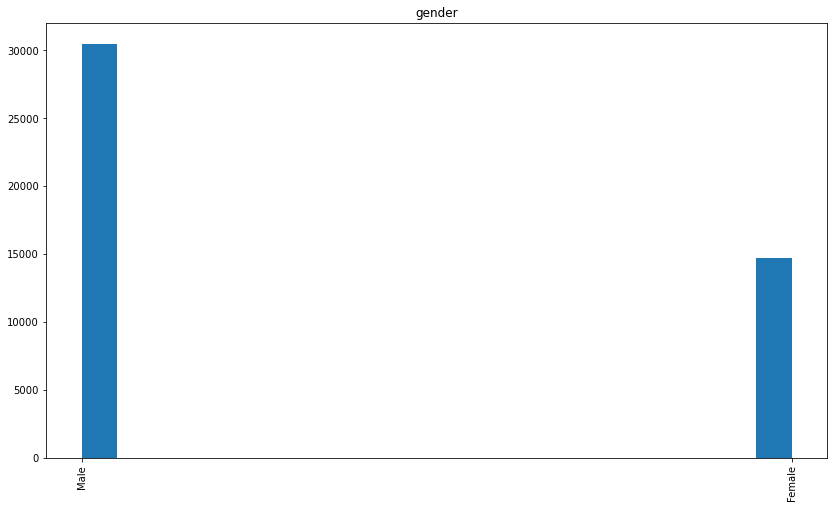

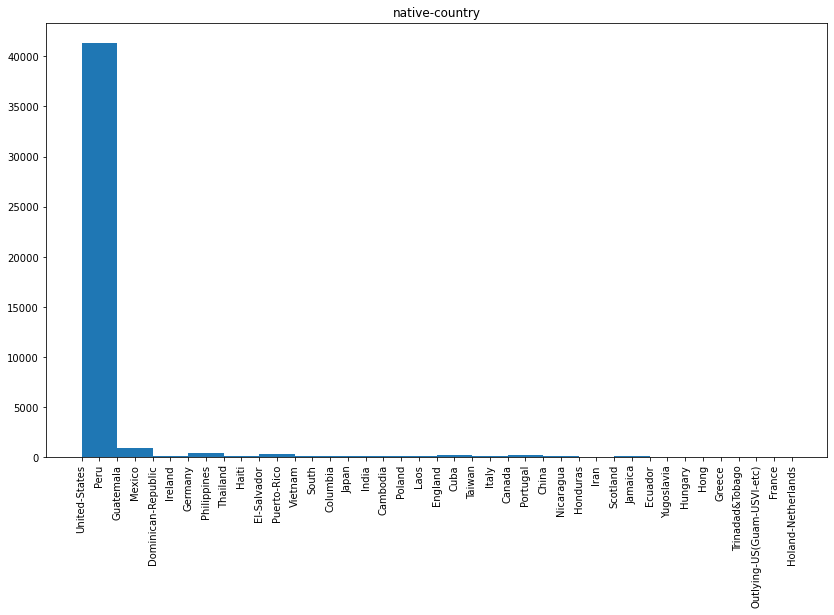

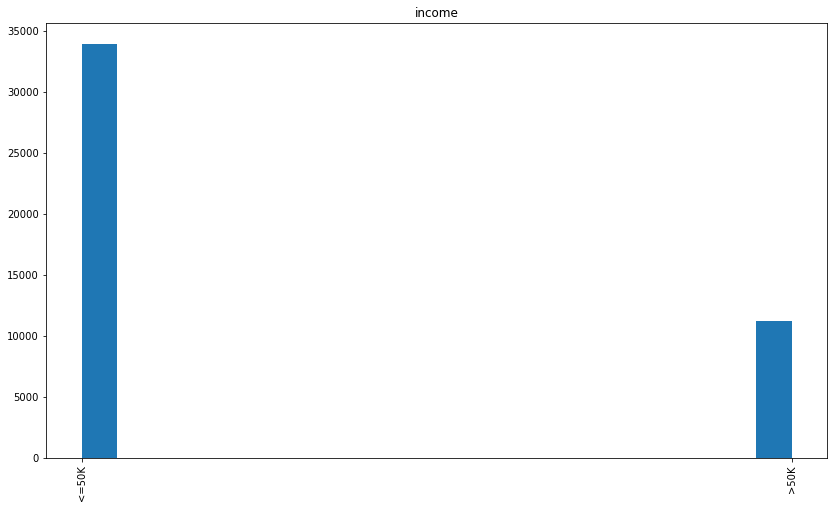

In [15]:
plot_cat_var(df)

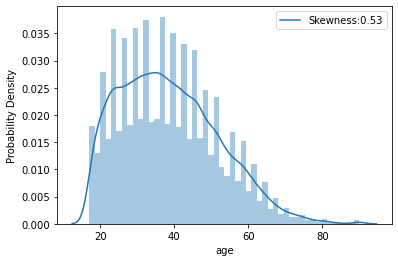

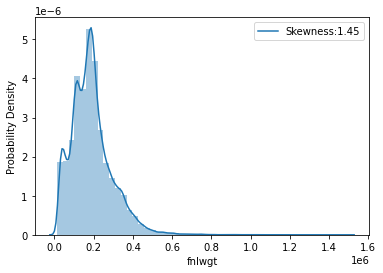

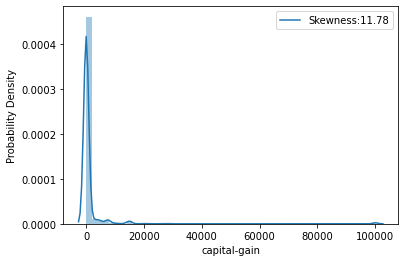

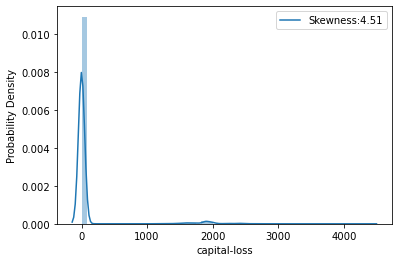

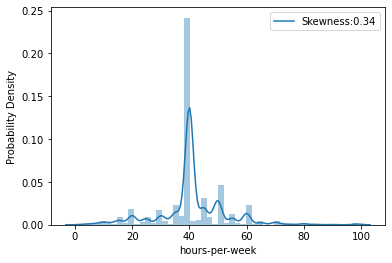

In [16]:
for col in numeric_cols:
    bar = sns.distplot(df[col], label=col)
    bar.legend(['Skewness:{:0.2f}'.format(df[col].skew())])
    plt.ylabel('Probability Density')
    plt.xlabel(col)
    plt.show()

In [17]:
# df['age'] = np.log(df['age'])
# df['hours-per-week'] = np.log(df['hours-per-week'])

In [18]:
def check_outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    print(f'{col} outliers: {df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]}')

check_outliers(df, 'age')
check_outliers(df, 'hours-per-week')
check_outliers(df, 'capital-gain')
check_outliers(df, 'capital-loss')
check_outliers(df, 'fnlwgt')

age outliers: 268
hours-per-week outliers: 11889
capital-gain outliers: 3790
capital-loss outliers: 2140
fnlwgt outliers: 1332


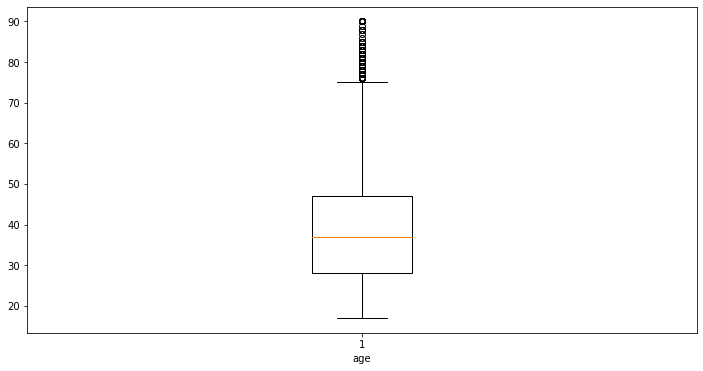

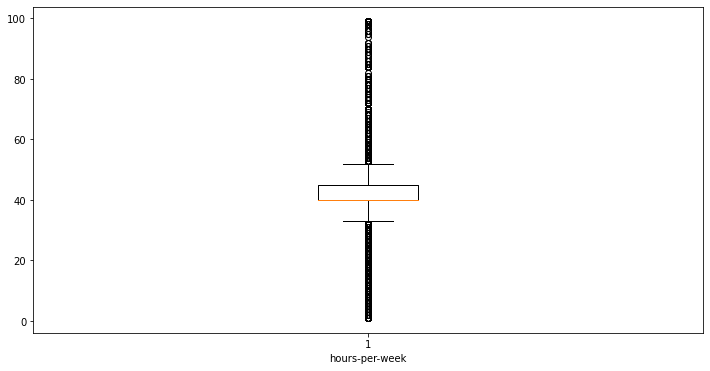

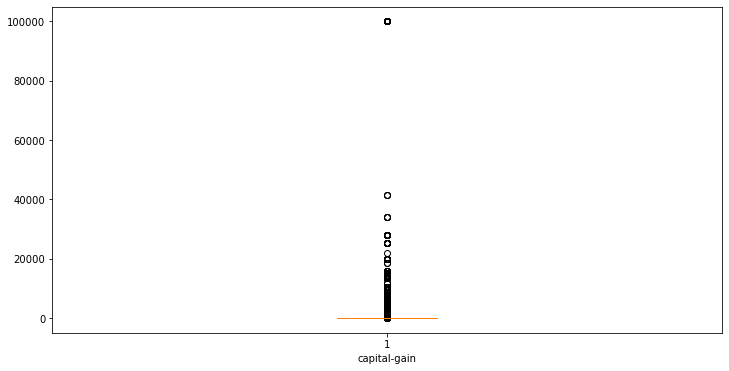

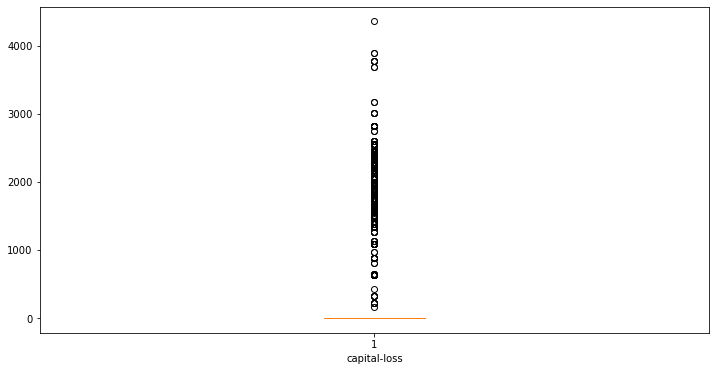

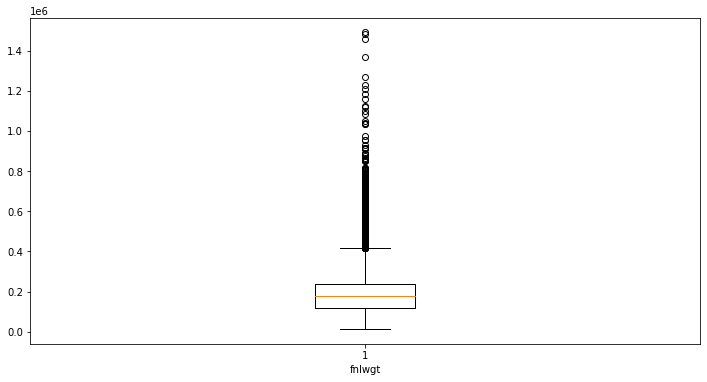

In [19]:
def check_outliers_boxplot(df, col):
    plt.figure(figsize=(12,6))
    plt.xlabel(col)
    plt.boxplot(df[col])
    plt.show()

check_outliers_boxplot(df, 'age')
check_outliers_boxplot(df, 'hours-per-week')
check_outliers_boxplot(df, 'capital-gain')
check_outliers_boxplot(df, 'capital-loss')
check_outliers_boxplot(df, 'fnlwgt')

In [20]:
q1 = df['age'].quantile(0.25)
q3 = df['age'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (iqr * 1.5)
upper_bound = q3 + (iqr * 1.5)
df = df[(df['age'] > lower_bound) & (df['age'] < upper_bound)]
df.shape

(44907, 14)

<AxesSubplot:xlabel='age'>

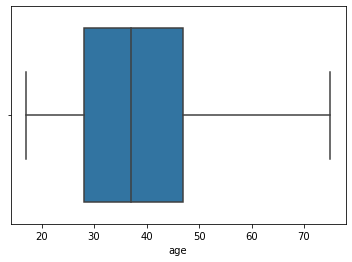

In [21]:
sns.boxplot(df['age'])

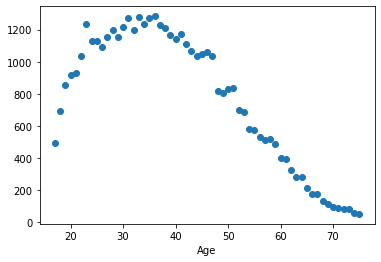

In [26]:
plt.scatter(df['age'].value_counts().index, df['age'].value_counts().values)
plt.xlabel('Age')
plt.show()

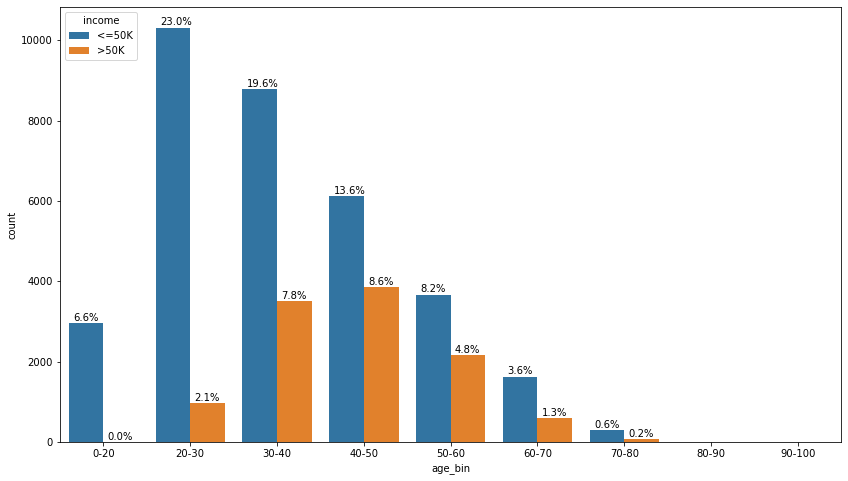

In [27]:
df['age_bin'] = pd.cut(df['age'], bins=[0, 20, 30, 40, 50, 60, 70, 80, 90, 100],
 labels=['0-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100'])

plt.figure(figsize=(14,8))
a =sns.countplot(x='age_bin',hue='income',data=df)

total = len(df['age_bin'])
for i in a.patches:
    percenatge = (i.get_height()/total)*100
    a.annotate( '{:.1f}%'.format(percenatge), (i.get_x()+0.05, i.get_height()+60))

Text(0.5, 1.0, 'Income distribution by Age')

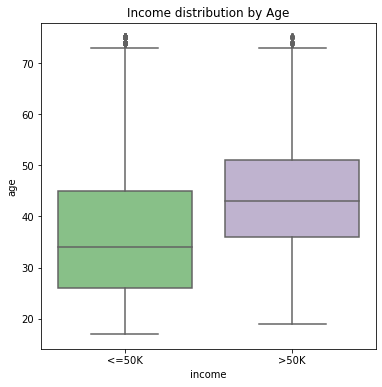

In [28]:
fig = plt.figure(figsize = (6,6))
sns.boxplot(x = 'income', y = 'age', data = df, palette = "Accent").set_title("Income distribution by Age")

In [29]:
df.education.value_counts()

HS-grad         14687
Some-college     9851
Bachelors        7525
Masters          2499
Assoc-voc        1954
11th             1612
Assoc-acdm       1504
10th             1216
7th-8th           782
Prof-school       775
9th               668
12th              572
Doctorate         537
5th-6th           441
1st-4th           215
Preschool          69
Name: education, dtype: int64

In [30]:
education=[]
school =['11th','10th','7th-8th','5th-6th','9th','12th','1st-4th','Preschool']
higher = ['Assoc-acdm','Assoc-voc','Prof-school','Some-college']


In [31]:
for i in df['education']:
    if i in school:
        education.append('School')
    elif i in higher:
        education.append('Higher')
    elif i == 'Bachelors':
        education.append('Bachelors')
    elif i == 'HS-grad':
        education.append('HS-grad')
    elif i == 'Doctorate':
        education.append('Doctorate')
    elif i == 'Masters':
        education.append('Masters')
    else:
        education.append('Other')

In [32]:
df['education'] = education

In [33]:
df.education.value_counts()

HS-grad      14687
Higher       14084
Bachelors     7525
School        5575
Masters       2499
Doctorate      537
Name: education, dtype: int64

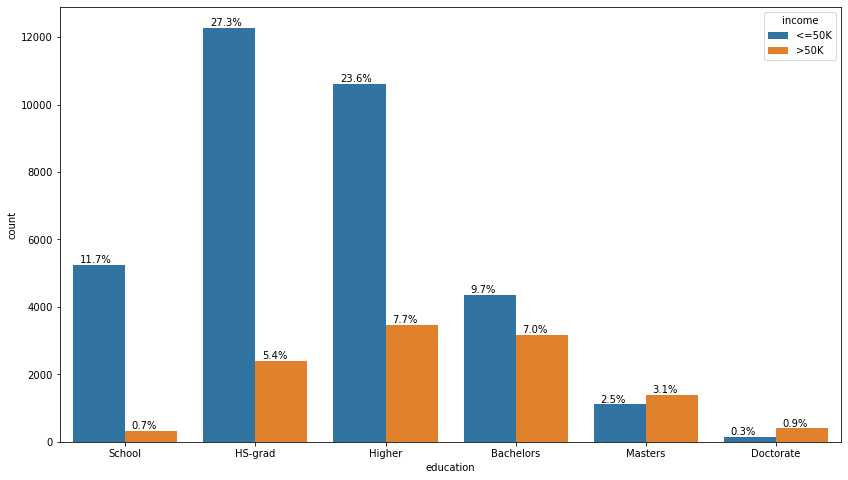

In [34]:
plt.figure(figsize=(14,8))
a =sns.countplot(x='education',hue='income',data=df)
total = len(df['education'])
for i in a.patches:
    percenatge = (i.get_height()/total)*100
    a.annotate( '{:.1f}%'.format(percenatge), (i.get_x()+0.05, i.get_height()+60))

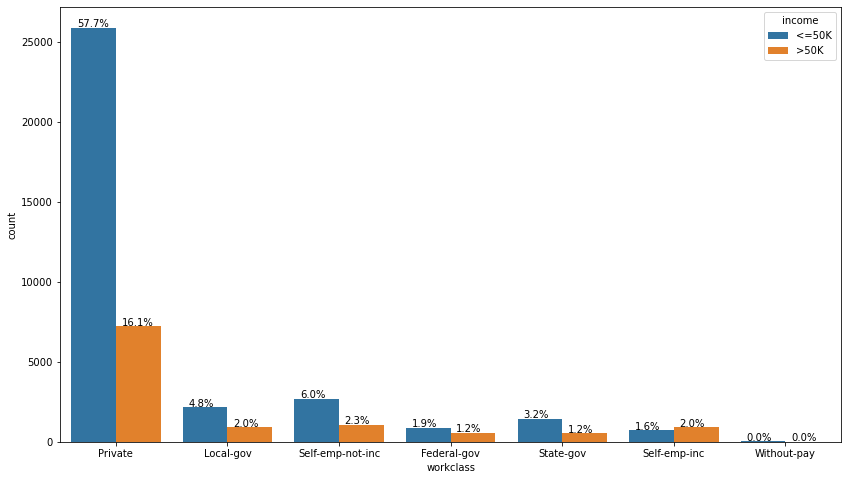

In [35]:
plt.figure(figsize=(14,8))
a =sns.countplot(x='workclass',hue='income',data=df)
total = len(df['workclass'])
for i in a.patches:
    percenatge = (i.get_height()/total)*100
    a.annotate( '{:.1f}%'.format(percenatge), (i.get_x()+0.05, i.get_height()+60))


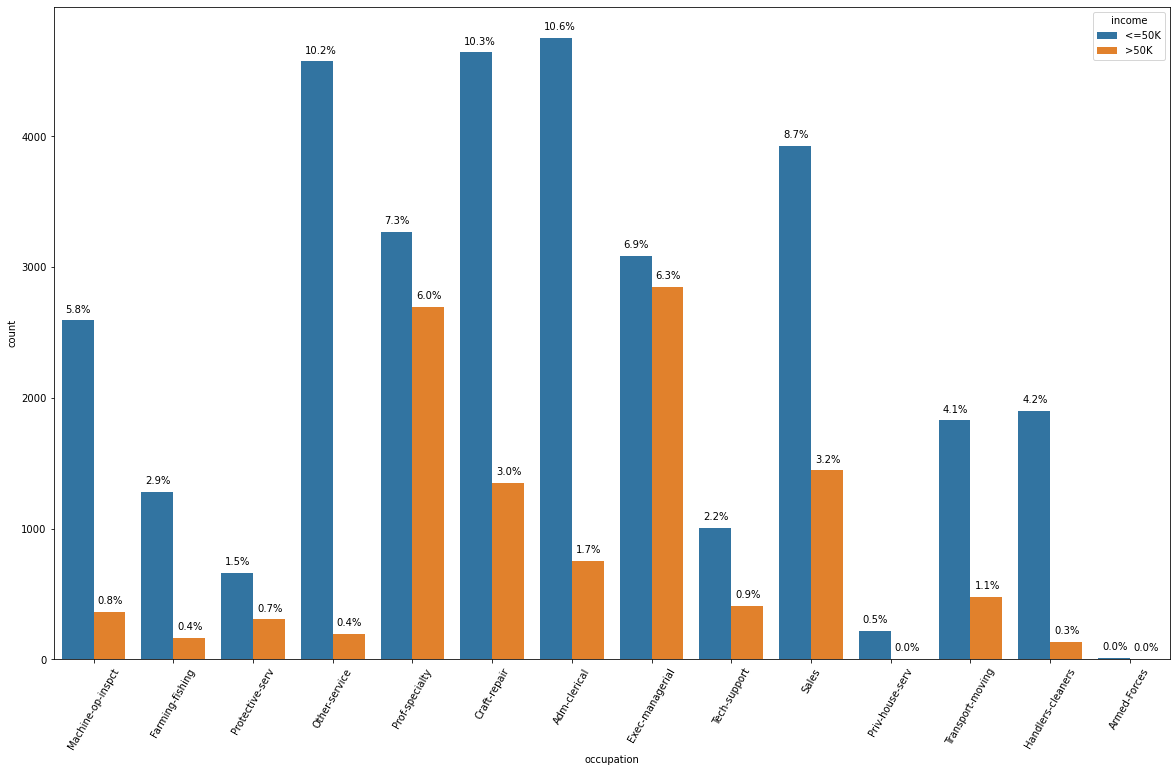

In [36]:
plt.figure(figsize=(20,12))
plt.xticks(rotation=60)
a =sns.countplot(x='occupation',hue='income',data=df)
total = len(df['occupation'])
for i in a.patches:
    percenatge = (i.get_height()/total)*100
    a.annotate( '{:.1f}%'.format(percenatge), (i.get_x()+0.05, i.get_height()+60))

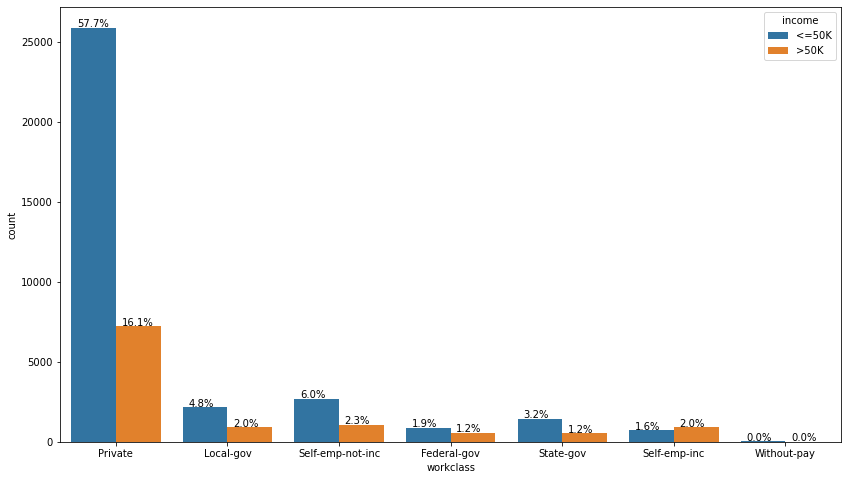

In [37]:
plt.figure(figsize=(14,8))
a = sns.countplot(x='workclass',hue='income',data=df)

total = len(df['workclass'])
for i in a.patches:
    percenatge = (i.get_height()/total)*100
    a.annotate( '{:.1f}%'.format(percenatge), (i.get_x()+0.05, i.get_height()+60))

In [38]:
df['hours_per_week_bin'] = pd.cut(df['hours-per-week'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    labels=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100'])

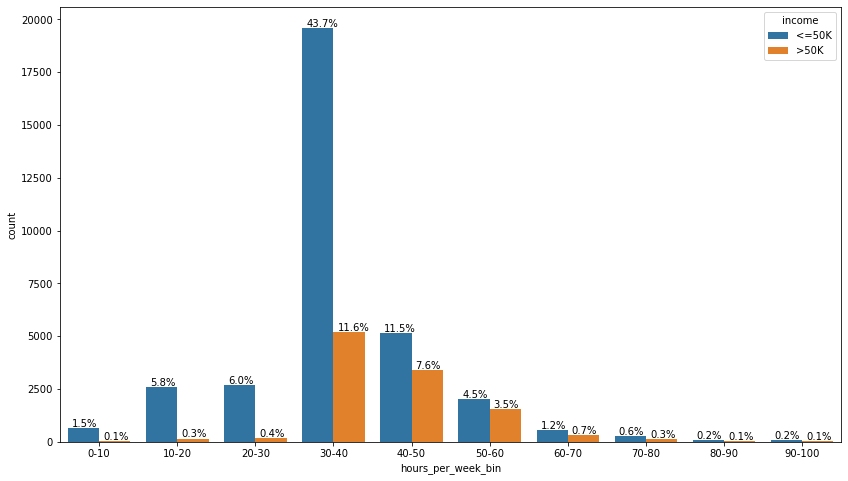

In [39]:
plt.figure(figsize=(14,8))
a =sns.countplot(x='hours_per_week_bin',hue='income',data=df)

total = len(df['hours_per_week_bin'])
for i in a.patches:
    percenatge = (i.get_height()/total)*100
    a.annotate( '{:.1f}%'.format(percenatge), (i.get_x()+0.05, i.get_height()+60))

In [40]:
df['marital-status'].value_counts()

Married-civ-spouse       20915
Never-married            14533
Divorced                  6281
Separated                 1410
Widowed                   1191
Married-spouse-absent      545
Married-AF-spouse           32
Name: marital-status, dtype: int64

In [41]:
martial_status_map = {'Married-civ-spouse': 'Married', 'Married-spouse-absent': 'Married', 'Married-AF-spouse': 'Married',
                         'Never-married': 'Single', 'Separated': 'Single',
                        'Widowed': 'Single', 'Divorced': 'Single'}
df['marital-status'] = df['marital-status'].map(martial_status_map)

In [42]:
df['marital-status'].value_counts()

Single     23415
Married    21492
Name: marital-status, dtype: int64

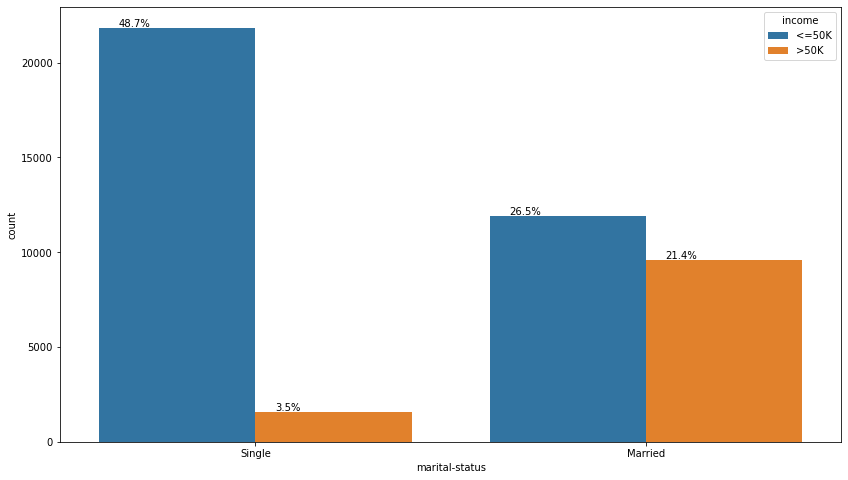

In [43]:
plt.figure(figsize=(14,8))
a =sns.countplot(x='marital-status',hue='income',data=df)

total = len(df['marital-status'])
for i in a.patches:
    percenatge = (i.get_height()/total)*100
    a.annotate( '{:.1f}%'.format(percenatge), (i.get_x()+0.05, i.get_height()+60))

In [44]:
df.gender.value_counts()

Male      30312
Female    14595
Name: gender, dtype: int64

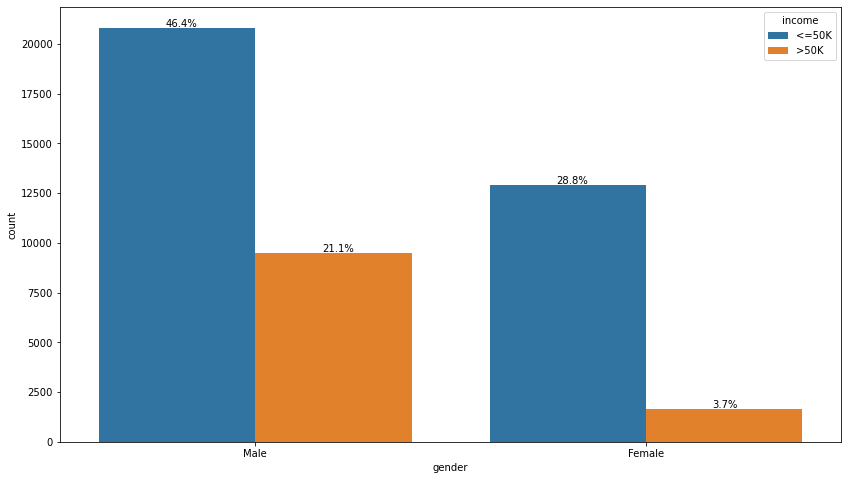

In [45]:
plt.figure(figsize=(14,8))
a =sns.countplot(x='gender',hue='income',data=df)

total = len(df['gender'])
for i in a.patches:
    percenatge = (i.get_height()/total)*100
    a.annotate( '{:.1f}%'.format(percenatge), (i.get_x()+0.17, i.get_height()+60))

In [46]:
df.race.value_counts()

White                 38615
Black                  4214
Asian-Pac-Islander     1292
Amer-Indian-Eskimo      434
Other                   352
Name: race, dtype: int64

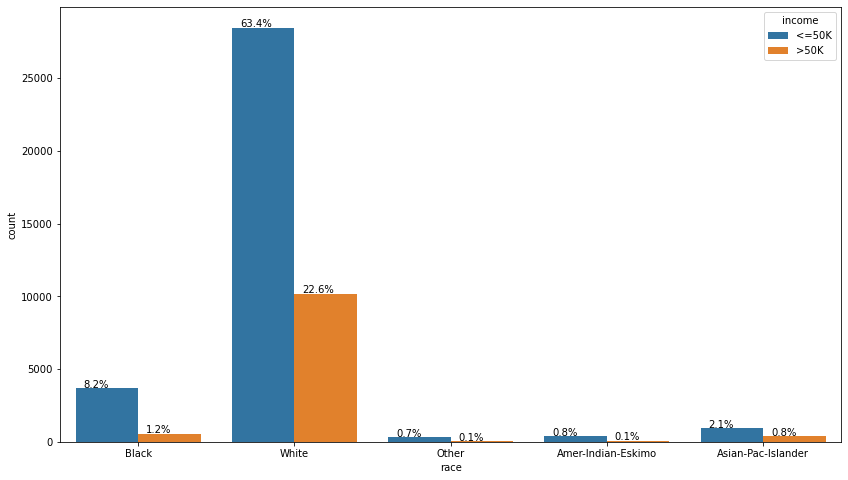

In [47]:
plt.figure(figsize=(14,8))
a =sns.countplot(x='race',hue='income',data=df)

total = len(df['race'])
for i in a.patches:
    percenatge = (i.get_height()/total)*100
    a.annotate( '{:.1f}%'.format(percenatge), (i.get_x()+0.05, i.get_height()+60))

<AxesSubplot:>

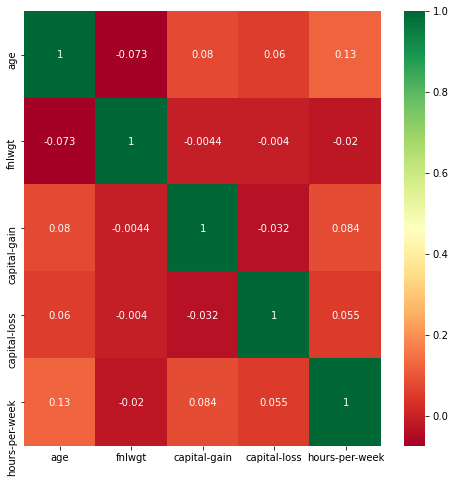

In [48]:
plt.figure(figsize = (8,8))
sns.heatmap(df.corr(), annot = True, cmap = "RdYlGn")

In [49]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income', 'age_bin',
       'hours_per_week_bin'],
      dtype='object')

In [52]:
df.drop(['age_bin','hours_per_week_bin'],axis=1,inplace=True)

In [53]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income'],
      dtype='object')

In [54]:
df['workclass'] = df['workclass'].astype('category').cat.codes
df['education'] = df['education'].astype('category').cat.codes
df['marital-status'] = df['marital-status'].astype('category').cat.codes
df['occupation'] = df['occupation'].astype('category').cat.codes
df['relationship'] = df['relationship'].astype('category').cat.codes
df['race'] = df['race'].astype('category').cat.codes
df['gender'] = df['gender'].astype('category').cat.codes
df['native-country'] = df['native-country'].astype('category').cat.codes
df['income'] = df['income'].astype('category').cat.codes

In [56]:
df.sample(5)

age  workclass  fnlwgt  education  marital-status  occupation  \
7660    18          3   29582          5               1           4   
46956   44          2  155472          3               1           9   
27398   29          2  351324          3               1          11   
1752    62          2  165827          2               0           2   
46601   46          2  415051          3               0          11   

       relationship  race  gender  capital-gain  capital-loss  hours-per-week  \
7660              3     4       1             0             0              50   
46956             4     2       0          1151             0              50   
27398             4     4       0             0             0              40   
1752              0     4       1             0             0              40   
46601             0     2       1             0             0              60   

       native-country  income  
7660               38       0  
46956              38       0  
27398              38       0  
1752               38       0  
46601              38       1

<AxesSubplot:>

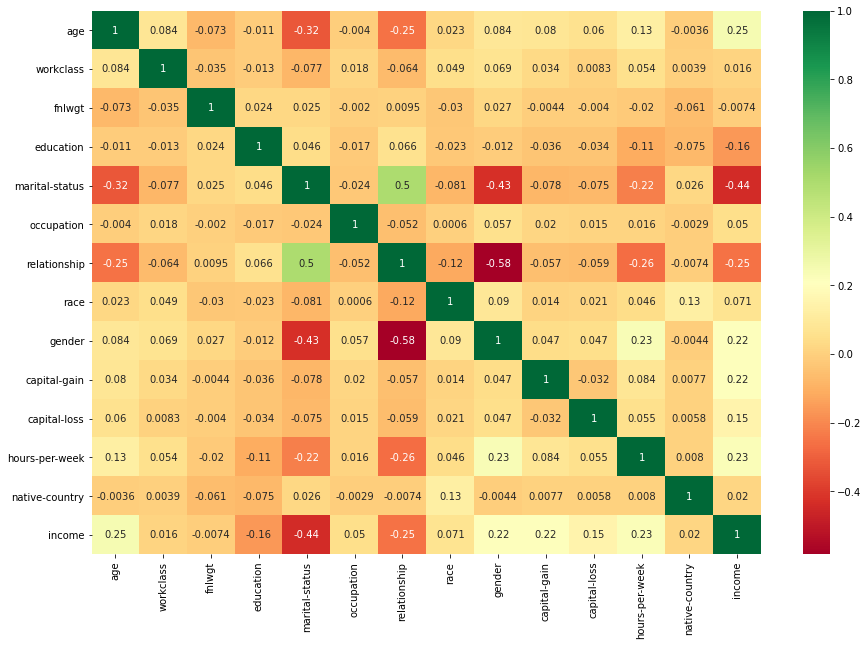

In [58]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), annot = True, cmap = "RdYlGn")

In [59]:
x = df.drop(['income'],axis=1)
y = df['income']

In [60]:
from sklearn.ensemble import ExtraTreesRegressor
selection=ExtraTreesRegressor(random_state=0)
selection.fit(x,y)

ExtraTreesRegressor(random_state=0)

<AxesSubplot:>

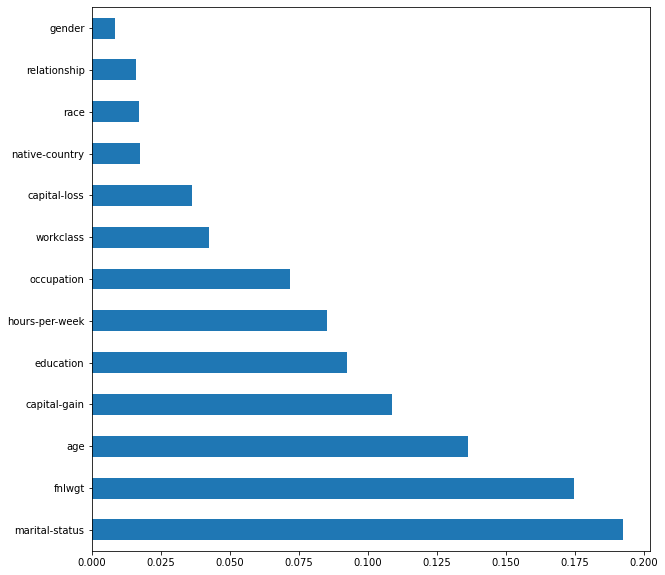

In [61]:
plt.figure(figsize = (10,10))
pd.Series(selection.feature_importances_,index=x.columns).nlargest(20).plot(kind='barh')